<a href="https://colab.research.google.com/github/pranitakhade/E-Commerce_Customer_Segmentation/blob/main/E_Com_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel('/content/cust_data.xlsx')
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
data.shape

(30000, 38)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data.nunique()

Cust_ID                   30000
Gender                        2
Orders                       13
Jordan                       16
Gatorade                     13
Samsung                      20
Asus                         17
Udis                         13
Mondelez International       13
Wrangler                     10
Vans                         16
Fila                         15
Brooks                       10
H&M                          16
Dairy Queen                  24
Fendi                        14
Hewlett Packard              10
Pladis                       11
Asics                        25
Siemens                      11
J.M. Smucker                 27
Pop Chips                    17
Juniper                      29
Huawei                       16
Compaq                       19
IBM                           9
Burberry                     21
Mi                            9
LG                           13
Dior                         12
Scabal                       11
Tommy Hi

In [8]:
data.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [9]:
data['Gender'].fillna('Unknown',inplace = True)

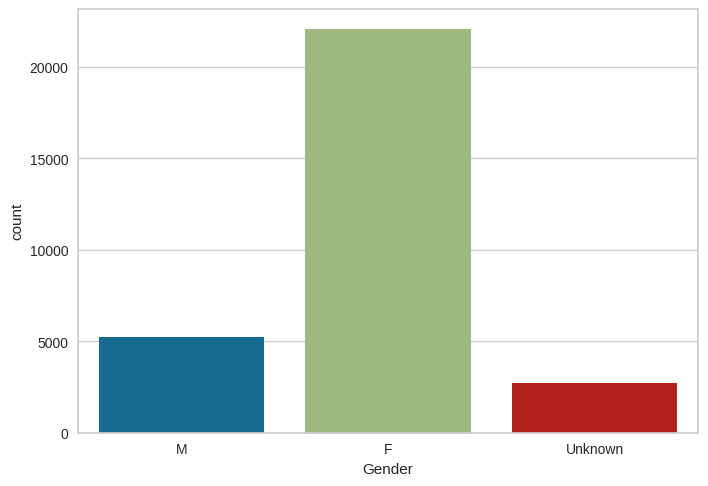

In [10]:
sns.countplot(data=data,x='Gender')
plt.show()

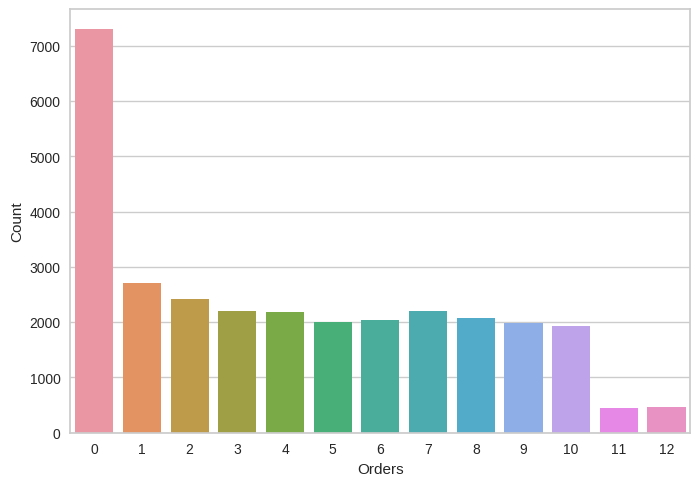

In [11]:
sns.countplot(data=data,x='Orders')
plt.xlabel("Orders")
plt.ylabel("Count")
plt.show()

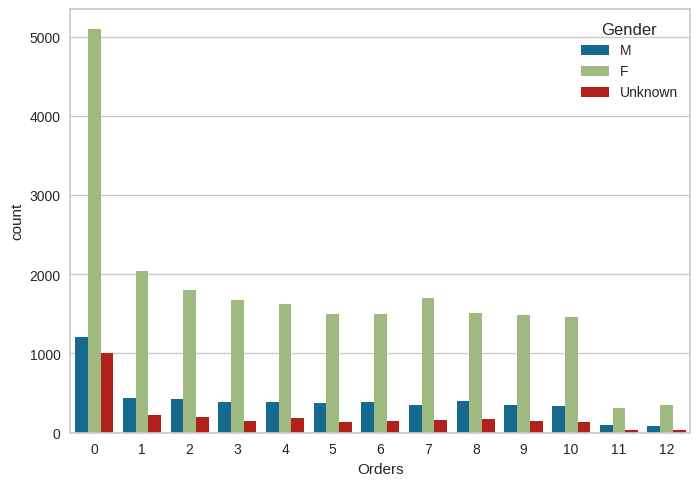

In [12]:
sns.countplot(data=data,x='Orders',hue='Gender')
plt.show()

In [13]:
data['Gender'] = data['Gender'].map({'F': 0, 'M': 1, 'Unknown': 2})

In [14]:
data['Gender'].value_counts()

0    22054
1     5222
2     2724
Name: Gender, dtype: int64

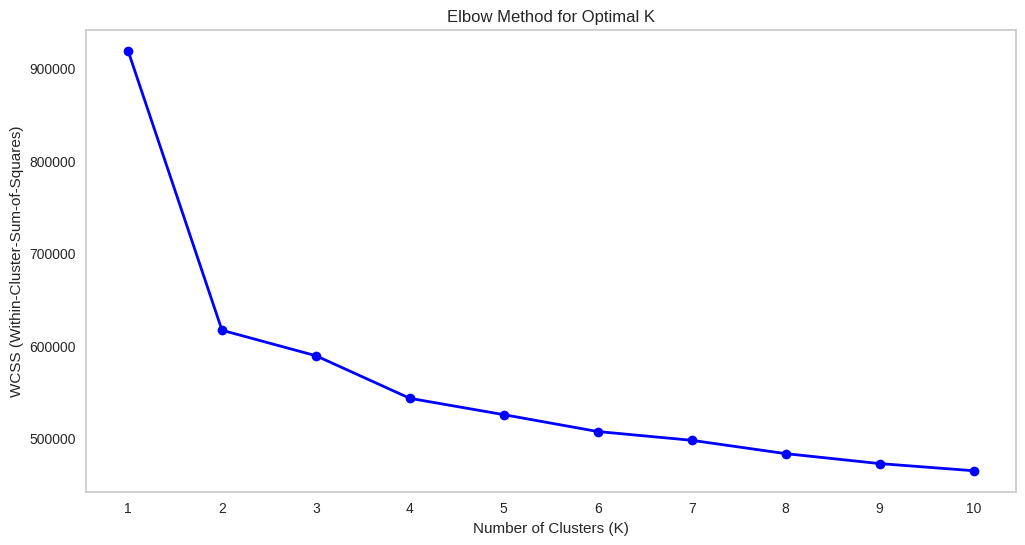

In [15]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init='auto', random_state=0)
    kmeans.fit(data.iloc[:, 2:])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="blue", marker="o")
plt.xlabel("Number of Clusters (K)")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS (Within-Cluster-Sum-of-Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


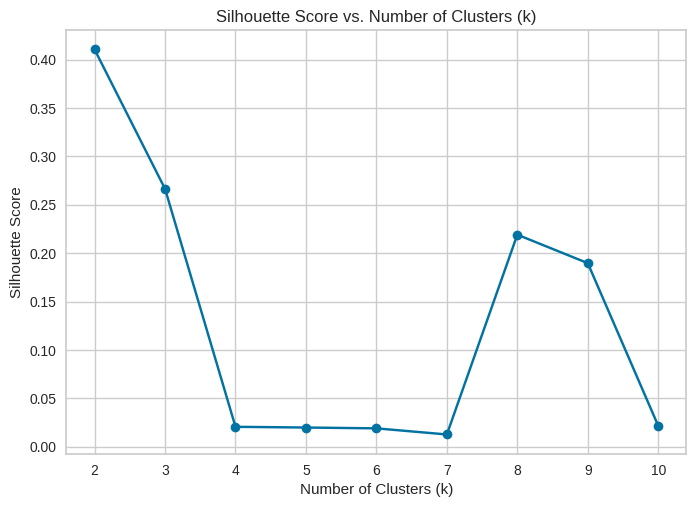

In [17]:
X = data.iloc[:, 2:]

scaler = StandardScaler()  # Standardize the features
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [18]:
optimal_k = possible_k_values[np.argmax(silhouette_scores)]   #np.argmax is used to find the index of the maximum Silhouette Score
print("Optimal number of clusters: ",optimal_k)

Optimal number of clusters:  2


In [19]:
kmeans = KMeans(n_clusters=optimal_k,n_init='auto', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
data['Cluster'] = cluster_labels

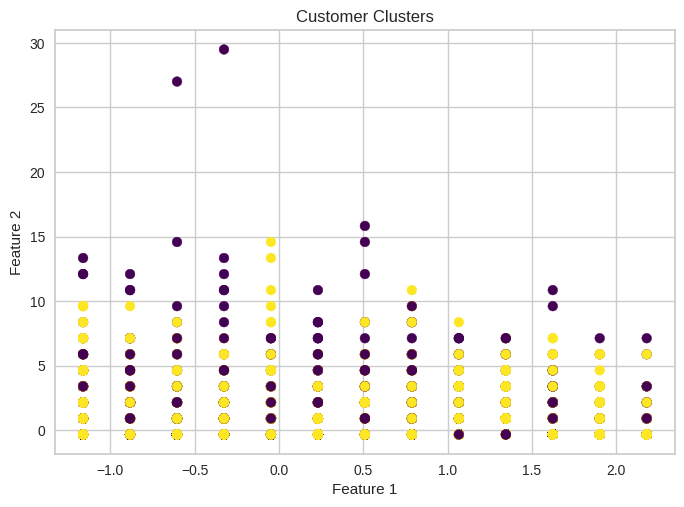

In [20]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Customer Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [21]:
for cluster_id in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster_id]
    num_customers = len(cluster_data)
    print(f"Cluster {cluster_id}:")
    print(f"Number of Customers: {num_customers}")

Cluster 0:
Number of Customers: 3358
Cluster 1:
Number of Customers: 26642


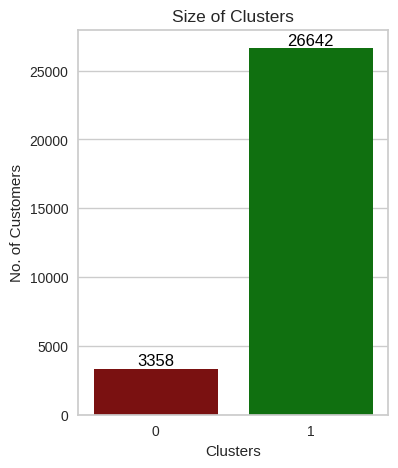

In [22]:
plt.figure(figsize=(4, 5))
sns.countplot(data=data, x='Cluster', palette=['darkred', 'green'])
plt.title('Size of Clusters', fontsize=12.5)
plt.xlabel('Clusters')
plt.ylabel('No. of Customers')

cluster = data['Cluster'].value_counts().sort_index(ascending=True)

for i, count in enumerate(cluster):
    plt.text(i, count, str(count), va='bottom', ha='center', color='black')
plt.show()

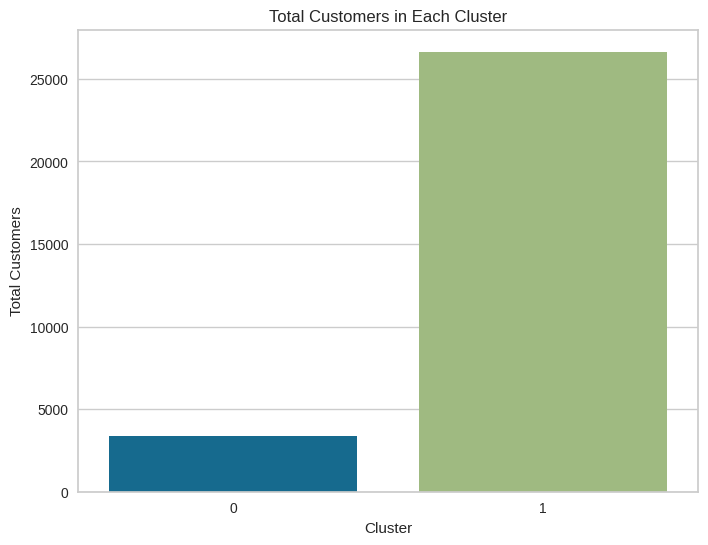

In [23]:
cluster_counts = data['Cluster'].value_counts().reset_index().sort_values(by='index')

plt.figure(figsize=(8, 6))
sns.barplot(x='index', y='Cluster', data=cluster_counts)
plt.xlabel('Cluster')
plt.ylabel('Total Customers')
plt.title('Total Customers in Each Cluster')
plt.show()

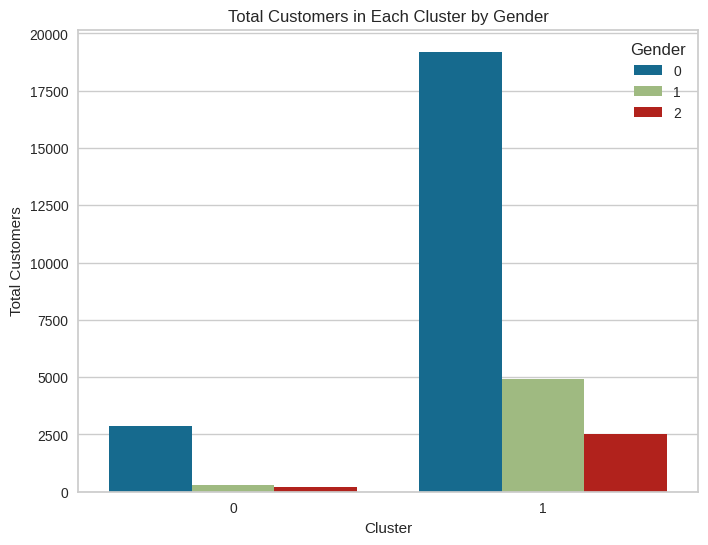

In [24]:
cluster_gender_counts = data.groupby(['Cluster', 'Gender'])['Cust_ID'].count().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Cust_ID', hue='Gender', data=cluster_gender_counts)

plt.xlabel('Cluster')
plt.ylabel('Total Customers')
plt.title('Total Customers in Each Cluster by Gender')
plt.legend(title='Gender')
plt.show()

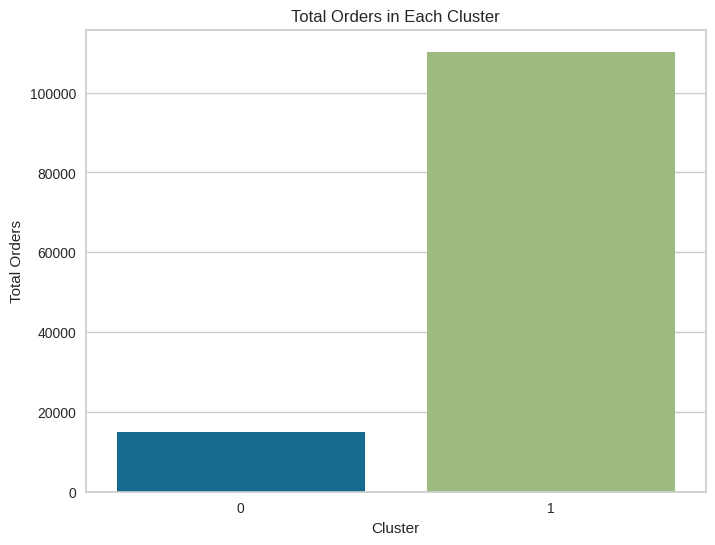

In [26]:
cluster_orders = data.groupby('Cluster')['Orders'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Orders', data=cluster_orders)
plt.xlabel('Cluster')
plt.ylabel('Total Orders')
plt.title('Total Orders in Each Cluster')
plt.show()

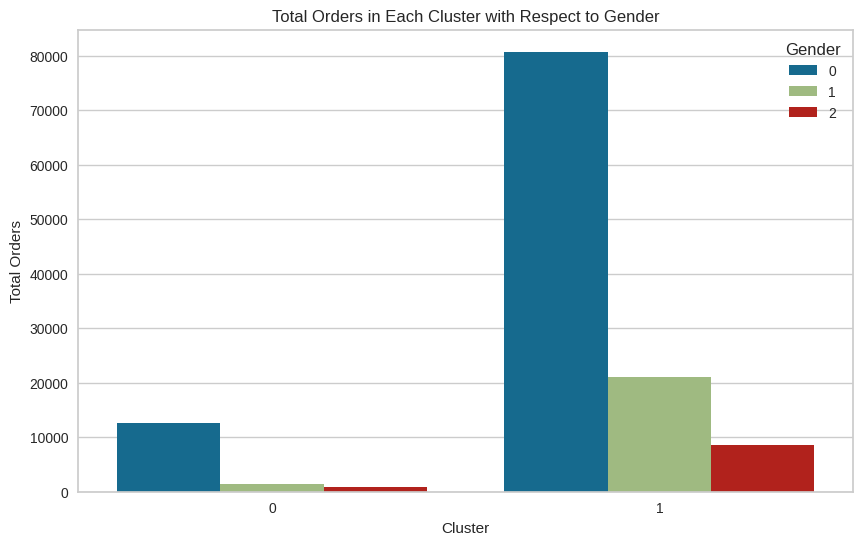

In [27]:
cluster_gender_orders = data.groupby(['Cluster', 'Gender'])['Orders'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Orders', hue='Gender', data=cluster_gender_orders)
plt.xlabel('Cluster')
plt.ylabel('Total Orders')
plt.title('Total Orders in Each Cluster with Respect to Gender')
plt.legend(title='Gender')
plt.show()

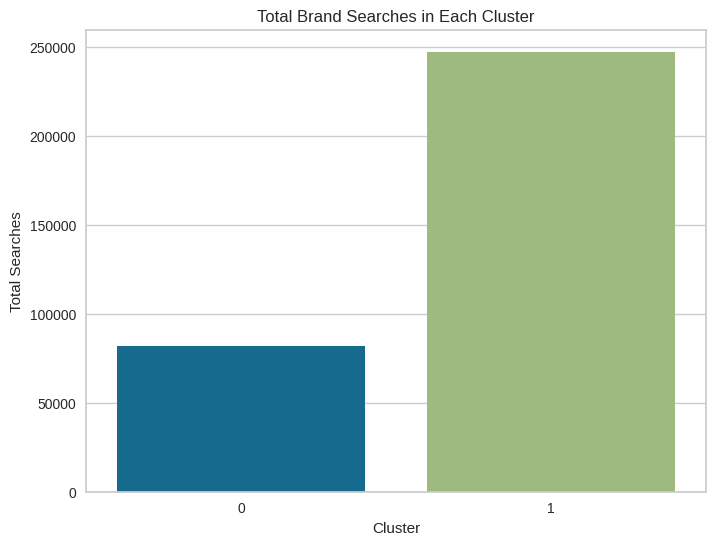

In [28]:
total_searches_in_cluster = data.groupby('Cluster').sum().iloc[:, 2:-1].sum(axis=1).reset_index()
total_searches_in_cluster.columns = ['Cluster', 'Total Searches']

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Total Searches', data=total_searches_in_cluster)
plt.xlabel('Cluster')
plt.ylabel('Total Searches')
plt.title('Total Brand Searches in Each Cluster')
plt.show()

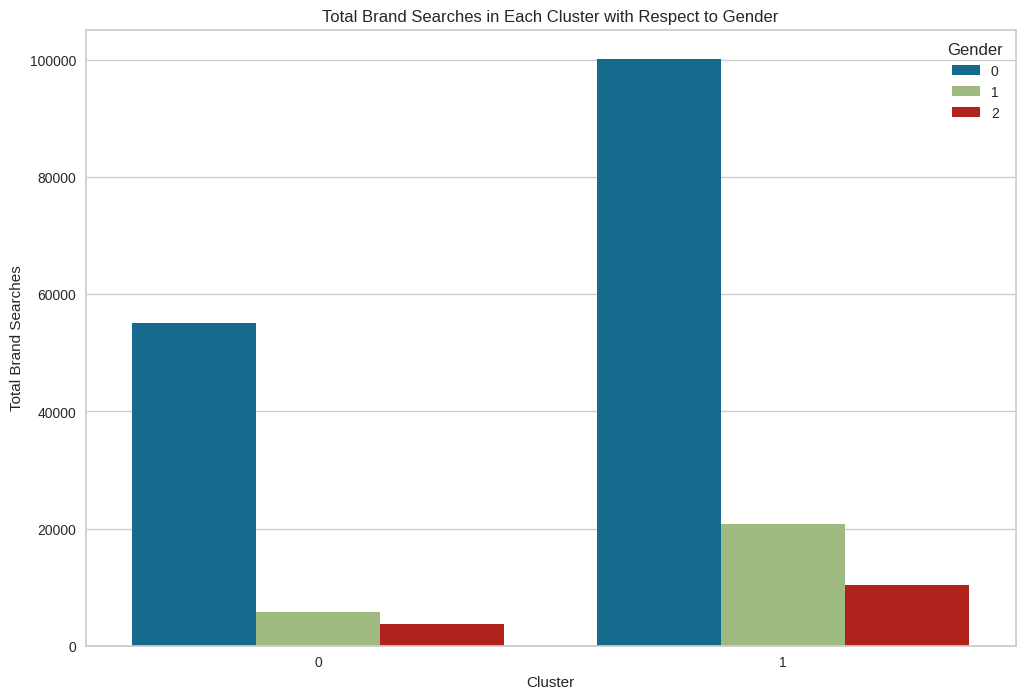

In [29]:
cluster_gender_brand_searches = data.groupby(['Cluster', 'Gender']).sum().iloc[:, 3:-1]

total_brand_searches = cluster_gender_brand_searches.sum(axis=1).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Cluster', y=0, hue='Gender', data=total_brand_searches)
plt.xlabel('Cluster')
plt.ylabel('Total Brand Searches')
plt.title('Total Brand Searches in Each Cluster with Respect to Gender')
plt.legend(title='Gender')
plt.show()

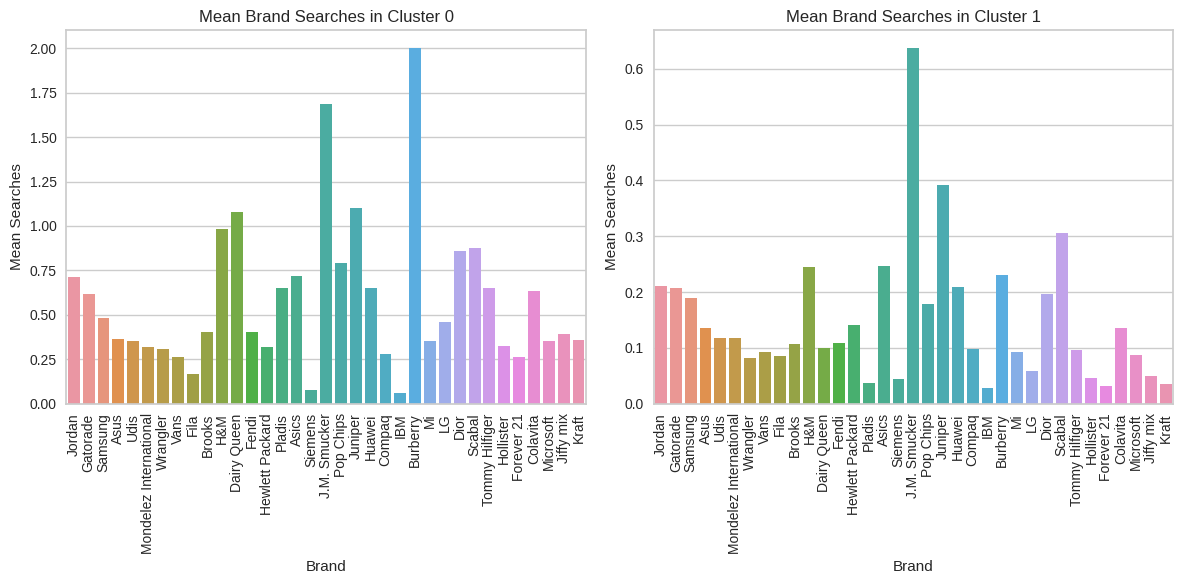

In [30]:
cluster_0_data = data[data['Cluster'] == 0]
cluster_1_data = data[data['Cluster'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

cluster_0_brand_means = cluster_0_data.mean()[3:38]
brand_names = cluster_0_brand_means.index
sns.barplot(x=brand_names, y=cluster_0_brand_means, ax=axes[0])
axes[0].set_title('Mean Brand Searches in Cluster 0')
axes[0].set_xticklabels(brand_names, rotation=90)
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Mean Searches')

cluster_1_brand_means = cluster_1_data.mean()[3:38]
sns.barplot(x=brand_names, y=cluster_1_brand_means, ax=axes[1])
axes[1].set_title('Mean Brand Searches in Cluster 1')
axes[1].set_xticklabels(brand_names, rotation=90)
axes[1].set_xlabel('Brand')
axes[1].set_ylabel('Mean Searches')
plt.tight_layout()
plt.show()


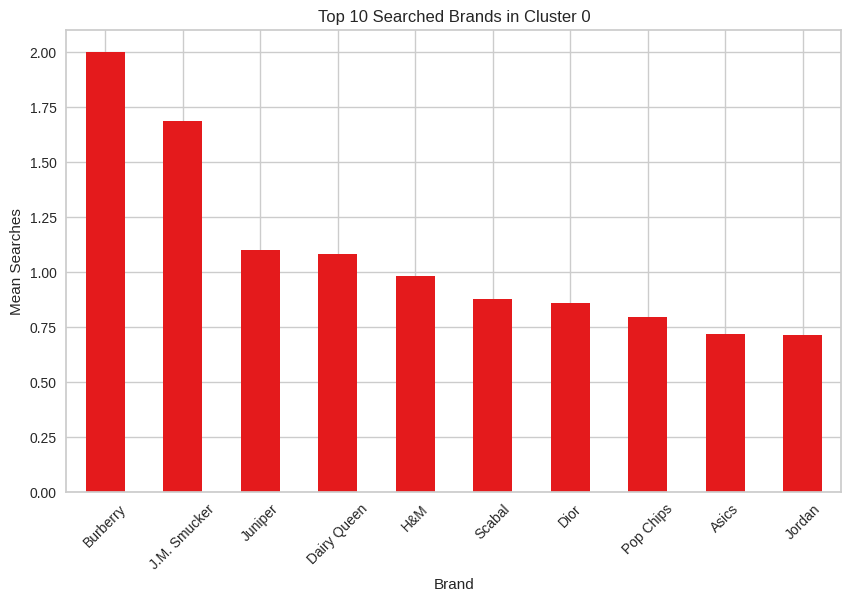

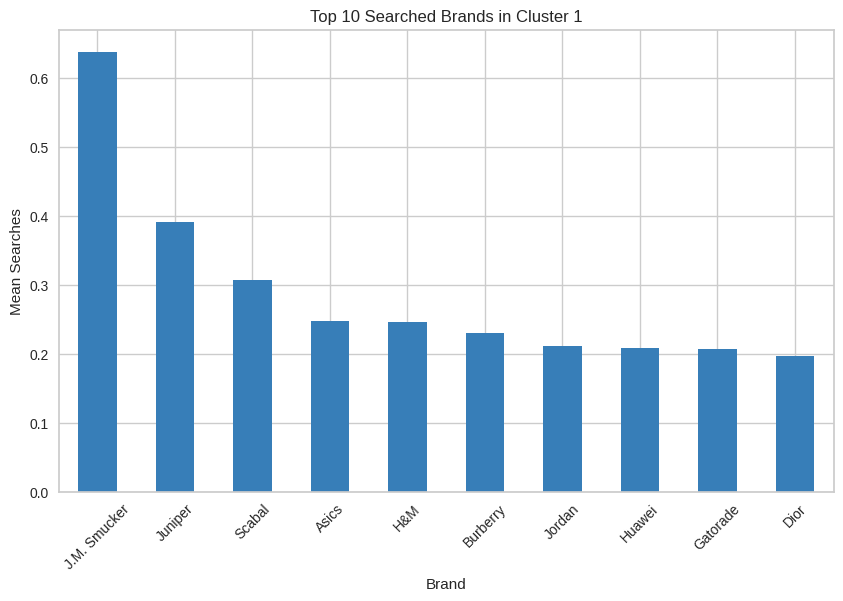

In [31]:
cluster_brand_means = data.groupby('Cluster').mean().iloc[:, 3:38]

top_brands = 10

cluster_colors = sns.color_palette("Set1", n_colors=len(cluster_brand_means))

for cluster_id in range(len(cluster_brand_means)):
    top_brands_cluster = cluster_brand_means.iloc[cluster_id].sort_values(ascending=False)[:top_brands]

    plt.figure(figsize=(10, 6))
    top_brands_cluster.plot(kind='bar', color=cluster_colors[cluster_id])
    plt.title(f'Top {top_brands} Searched Brands in Cluster {cluster_id}')
    plt.xlabel('Brand')
    plt.ylabel('Mean Searches')
    plt.xticks(rotation=45)
    plt.show()